In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [9]:
df = pd.read_csv('../files/input/news.csv', index_col=0)
df

,Television,Newspaper,Internet,Radio
2001,74,45,13,18
2002,82,42,14,21
2003,80,50,20,18
2004,74,46,24,21
2005,73,36,20,16
2006,72,36,24,14
2007,74,34,24,13
2008,70,35,40,18
2009,70,32,35,17
2010,66,31,41,16


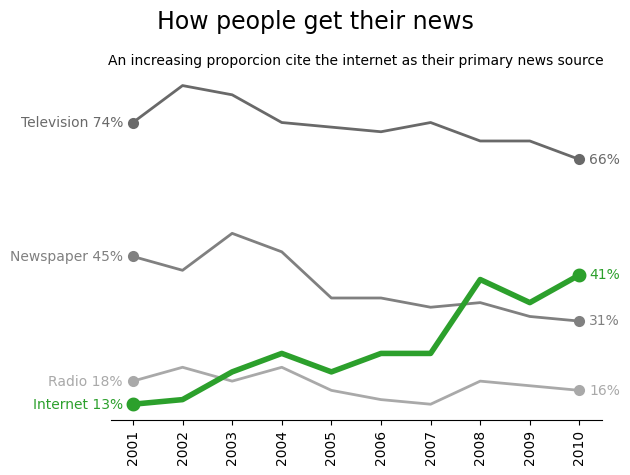

In [10]:
plt.Figure()

colors={
    'Television':'dimgray',
    'Newspaper': 'grey',
    'Internet': 'tab:green',
    'Radio': 'darkgrey',
}

zorder={
    'Television': 1,
    'Newspaper': 1,
    'Internet': 2,
    'Radio': 1,
}

linewidths={
    'Television': 2,
    'Newspaper': 2,
    'Internet': 4,
    'Radio': 2,
}

for col in df.columns:
    plt.plot(
        df[col],
        color=colors[col],
        label= col,
        zorder=zorder[col],
        linewidth=linewidths[col]
    )

plt.suptitle('How people get their news', fontsize=17)
plt.title('An increasing proporcion cite the internet as their primary news source', fontsize=10,y=0.99)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

for col in df.columns:
    first_year = df.index[0]
    plt.scatter(
        x=first_year,
        y=df[col][first_year],
        color= colors[col],
        zorder= zorder[col],
        linewidth=linewidths[col]
    )

    plt.text(
        first_year - 0.2,
        df[col][first_year],
        col + " " + str(df[col][first_year]) + '%',
        ha='right',
        va='center',
        color= colors[col]
    )


    last_year = df.index[-1]
    plt.scatter(
        x=last_year,
        y=df[col][last_year],
        color= colors[col],
        zorder= zorder[col],
        linewidth=linewidths[col]
    )

    plt.text(
        last_year + 0.2,
        df[col][last_year],
        str(df[col][last_year]) + '%',
        ha='left',
        va='center',
        color= colors[col]
    )

plt.xticks(
    ticks= df.index,
    labels= df.index,
    ha='center',
    rotation=90
)

ruta_completa='../files/plots/news.png'

try:
    os.makedirs(os.path.dirname(ruta_completa))
except FileExistsError:
    pass

plt.tight_layout()
plt.savefig(ruta_completa)

plt.show()